### Life Expectancy and GDP Python Project
#### by Albert Cort Banke
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/World_Health_Organization_Logo.svg/1280px-World_Health_Organization_Logo.svg.png" width="400"/>
</div>

Project scope

**Goal**: To draw insights from the dataset included and illustrate interesting features with visualizations and summary statistics

**Data**: The data stems from and is provided by WHO. Thus the findings will be published at their website

**Analysis**: We use exploratory data analysis and hypothesis testing to assess the data and determine associations in the data. 

1. Preparation

Import the relevant libraries (A) and import and read the data (B)

In [42]:
# (A)
from matplotlib import pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import numpy as np
import seaborn as sns

In [43]:
# (B)
df = pd.read_csv('all_data.csv')

# We print the first few observations to check the data has been imported correctly
print(df.head())
# We confirm the data has been imported correctly

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


2. Data transformation

Review (C) the dataset and prepare (D) it for the exploratory data analysis


In [44]:
# (C) To review, we use Pandas built-in functions to gain more information about the data at hand
# The .info() function helps provide this information

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


Starting from left to right, we see there are 4 columns. These are ***Country***, ***Year***, ***Life expectancy at birth (years)***, and ***GDP***

Moreover there are **96** instances, where 0 non-null values are present. This means we have a complete dataset. 

The data composition is the following: Country = nominal categorical values, Year = quantitative discrete values, Life expectancy at birth (years) = quantitative continuous values, GDP = quantitative continuous values. In short, the variables we are dealing with are both quantitative and categorical. This is important for the following analysis - both exploratory and statistical

During the preparation an aspect of the GDP column became clear. The values are rather large, thus it is difficult to plot the data when the values are too large. Let's inspect the range of the values and confirm the hypothesis.

In [45]:
print(df['GDP'].max())
print(df['GDP'].min())

# Max = 18100000000000.0
# Min = 4415702800.0

# Evidently, the range between the max and min values of the GDP variable is significant
# To remedy this we move onto the next part of the data transformation

18100000000000.0
4415702800.0


In [46]:
# (D) The data transformation will convert the GDP values to be represented in billions (USD)
# The lambda function is used to make a strong and easy implementation of this in the df['GDP'] column

df['GDP'] = df.apply(lambda x: x['GDP']/1000000000, axis = 1)

# Printing the dataframe to inspect if the transformation has been implemented correctly
# As one can see in the GDP column, it has indeed been implemented well

print(df)

     Country  Year  Life expectancy at birth (years)        GDP
0      Chile  2000                              77.3  77.860932
1      Chile  2001                              77.3  70.979924
2      Chile  2002                              77.8  69.736811
3      Chile  2003                              77.9  75.643460
4      Chile  2004                              78.0  99.210393
..       ...   ...                               ...        ...
91  Zimbabwe  2011                              54.9  12.098451
92  Zimbabwe  2012                              56.6  14.242490
93  Zimbabwe  2013                              58.0  15.451769
94  Zimbabwe  2014                              59.2  15.891049
95  Zimbabwe  2015                              60.7  16.304668

[96 rows x 4 columns]


In [47]:
# (D) to ensure that the EDA goes without error we change the column titles. 
# A minor operation which can help when coding the plots

df.columns = ['country', 'year', 'life_expectancy_yrs', 'gdp_usdb']

# Checking whether the column names has been updated 

print(df.columns)

# Changing the value 'United States of America' to USA

df['country'] = df['country'].replace({'United States of America': 'USA'})

print(df)

# The dataset looks good, and the project continues on the the EDA


Index(['country', 'year', 'life_expectancy_yrs', 'gdp_usdb'], dtype='object')
     country  year  life_expectancy_yrs   gdp_usdb
0      Chile  2000                 77.3  77.860932
1      Chile  2001                 77.3  70.979924
2      Chile  2002                 77.8  69.736811
3      Chile  2003                 77.9  75.643460
4      Chile  2004                 78.0  99.210393
..       ...   ...                  ...        ...
91  Zimbabwe  2011                 54.9  12.098451
92  Zimbabwe  2012                 56.6  14.242490
93  Zimbabwe  2013                 58.0  15.451769
94  Zimbabwe  2014                 59.2  15.891049
95  Zimbabwe  2015                 60.7  16.304668

[96 rows x 4 columns]


3. Exploratory Data Analysis

This section consists of two parts. The first is a summary (E) of the statistical aspects of the data. The second is visualization (F) module, which consists of univariate, bivariate, and multivariate analysis.  

In [48]:
# (E) Summary statistics with Pandas .describe() function

print(df.describe())

              year  life_expectancy_yrs      gdp_usdb
count    96.000000            96.000000     96.000000
mean   2007.500000            72.789583   3880.498571
std       4.633971            10.672882   5197.561311
min    2000.000000            44.300000      4.415703
25%    2003.750000            74.475000    173.301750
50%    2007.500000            76.750000   1280.220000
75%    2011.250000            78.900000   4067.510000
max    2015.000000            81.000000  18100.000000


Interpretation of the statistics

***Year:*** The first instance of the data is in year 2000 while the last is in 2015
As this is a time series dataset, the significance of the year attribute is its non-missing status. Furthermore we see the instances are entered in the same way via the correct calculations in the summary table

***Life_expectancy_yrs:*** The max expectancy is 81 years while the minimum age is 44.3. This implies that the range in this attribute is significant 
The mean is 72.78 years. In other words, the mean is quite high and close to the max value. 
This could indicate that many of the countries sampled are modernerized

***GDP:*** The highest GDP in a year is 18100 billion USD. Meanwhile the lowest in a year is 4.4 billion USD. A strong distance between the two values
The mean GDP is 3880 billion usd. Having such high values implies that the interquartile range will be far from each other. In other words, there will be outliers

Note how the country variable is not represented in the summary table. This is because the variable is categorical and unfit for quantitative analysis

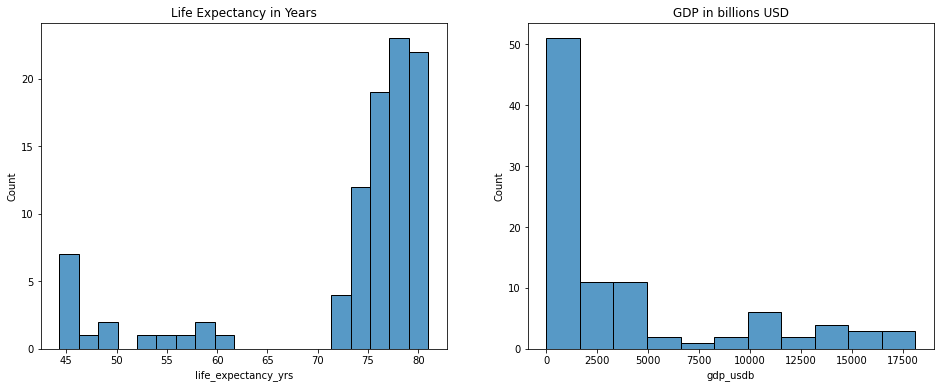

<Figure size 432x288 with 0 Axes>

In [49]:
# (F) Univariate data analysis

# Plotting a histogram of the Life expectancy in years

plt.figure(figsize = [16, 6])


plt.subplot(1, 2, 1)
ax = sns.histplot(data = df, x='life_expectancy_yrs')
plt.title('Life Expectancy in Years')

# Interpretation: We see a divide above and below 60. 
# This could indicate that the countries investigated have a binary difference in the medical infrastructure and general well being
# Example being developing economies vs developed economies

plt.subplot(1, 2, 2)
ax1 = sns.histplot(data = df, x='gdp_usdb')
plt.title('GDP in billions USD')
plt.show()
plt.clf()

# Interpretation: The GDP variable is right-skewed. 
# The median is shown by the white dot and the quartiles by the thick line in the middle. 
# This indicates that there are outliers 

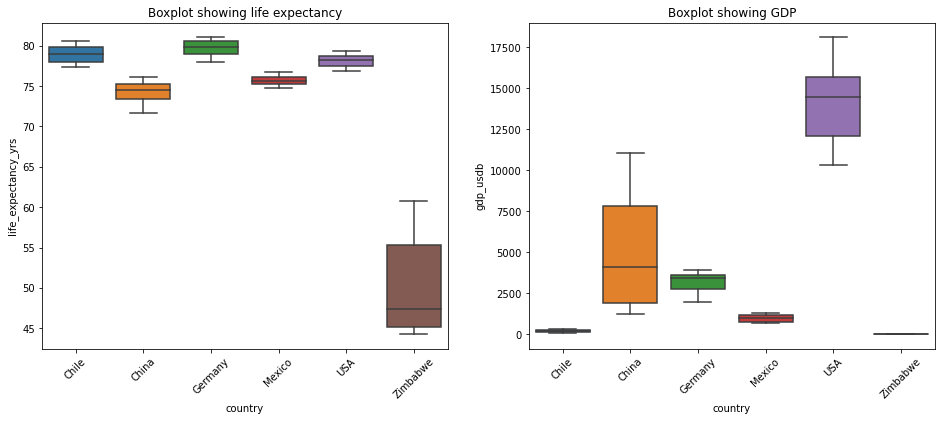

<Figure size 432x288 with 0 Axes>

In [50]:
# (F) Bivariate data analysis

# Plotting a boxplot showing the countries different composition of the GDP and life expectancy variables
plt.figure(figsize = [16, 6])

plt.subplot(1, 2, 1)
plt.xticks(rotation = 45)
ax2 = sns.boxplot(data = df, x = 'country', y ='life_expectancy_yrs')
plt.title('Boxplot showing life expectancy')

plt.subplot(1, 2, 2)
plt.xticks(rotation = 45)
ax3 = sns.boxplot(data = df, x = 'country', y ='gdp_usdb')
plt.title('Boxplot showing GDP')

plt.show()
plt.clf()

# Interpretation: Two points become clearly visible from these boxplots. All but one country has life expectancy above 70 years
# This explains the earlier gap in life expectancy.
# Furthermore, the association between GDP and life expectancy is not clear between these two graphs. 
# Evidently Chile has a higher life expectancy than Mexico but a lower GDP per capita in billions USD.

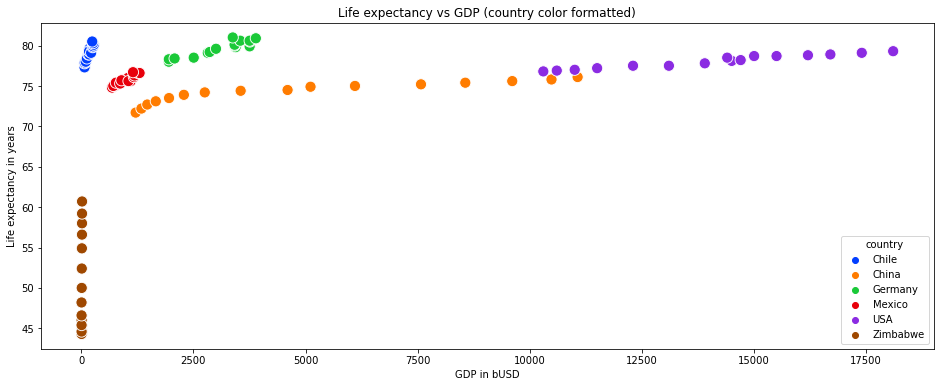

<Figure size 432x288 with 0 Axes>

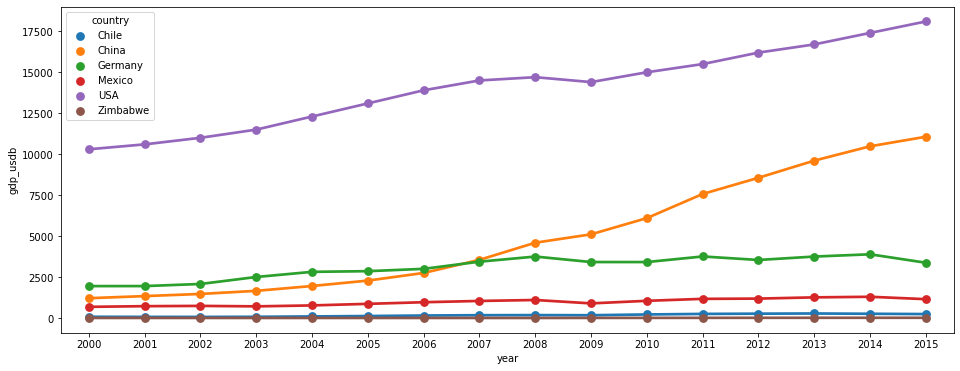

<Figure size 432x288 with 0 Axes>

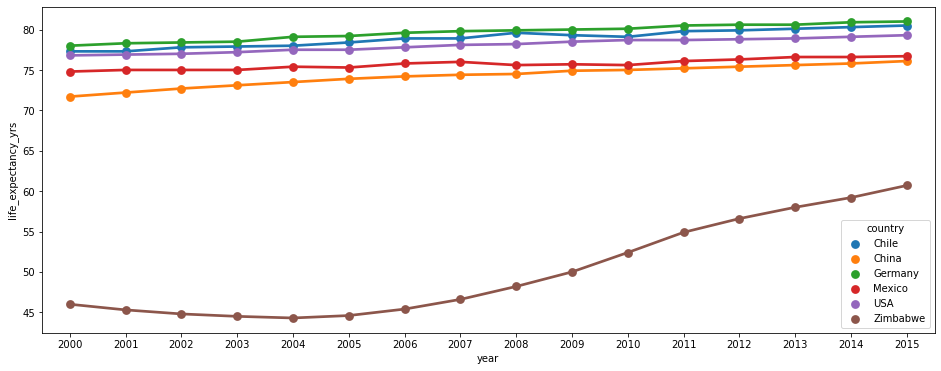

<Figure size 432x288 with 0 Axes>

In [67]:
# (F) Multivariate data analysis

# Plotting a scatterplot to show the association between GDP and life expectancy and the respective countries
plt.figure(figsize = [16, 6])
ax4 = sns.scatterplot(data = df, x = 'gdp_usdb', y = 'life_expectancy_yrs', hue = 'country', palette= 'bright', s = 125)

plt.title('Life expectancy vs GDP (country color formatted)')
plt.xlabel('GDP in bUSD')
plt.ylabel('Life expectancy in years')

plt.show()
plt.clf()

# Plotting pointplots to show the changes in the variables over time
plt.figure(figsize = [16, 6])
ax5 = sns.pointplot(data = df, x = 'year', y = 'gdp_usdb', hue = 'country')

plt.show()
plt.clf()

plt.figure(figsize = [16, 6])
ax6 = sns.pointplot(data = df, x = 'year', y = 'life_expectancy_yrs', hue = 'country')

plt.show()
plt.clf()


# Interpretation: The first graph shows how the association between GDP and life expectancy is relatively linear. 
# The second graph, the pointplot show how GDP has increased over time, but its harder to distinct for Zimbabwe and Chile. 
# Meanwhile, China has tripled its GDP in the same period. USA has increased its GDP in the same period as well.
# Finally, the third graph show how Zimbabwe has increased its life expectancy with almost 20 years during the same period


4. Hypothesis testing

The hypothesis test consists of a (G) correlation analysis between the two main components of the dataset: GDP and life expectancy. The aim is to analyze whether there is an association between these. 

In [52]:
# (G) Correlation analysis 

corr_gdp_lifeexp, p = pearsonr(df.gdp_usdb, df.life_expectancy_yrs)
print(corr_gdp_lifeexp)

# Interpretation: As the result is an association just above 0.3 with 0.343 
# We can conclude there is a linear relationship between GDP in bUSD and life expectancy in years.
# In other words, the higher the GDP, the higher the life expectancy

0.34320674844915594


5. Conclusion

From the data and analaysis above two important features stand out. One is the fact that life expectancy has increased in the past years for all sampled countries. Some have experienced more growth than others. The same is true for GDP, however this is more hard to see from graphs as Zimbabwe and Chile's GDP is relatively small as compared to USA and China, for example. 

For WHO, the main conclusion should be that there are is linear relationship between life expectancy and GDP. This does not mean, that a high GDP ensures higher life expectancy. It implies that positive changes in GDP is reflected in the overall life expectancy as well. 

A great example is Chile having a small GDP but a high life expectancy. The main conclusion should be that a high life expectancy does not derive from GDP, but can be affected positive changes herein. The example here is Zimbabwe, where life expectancy has increased significantly during past years. *Note to self, what does this mean, and what question could this lead to?

